In [1]:
import pandas
import seaborn
from pathlib import Path
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [2]:
from pandas.core.reshape.merge import merge
xtrain = read_csv(Path('data/Xtrain.csv'))
ytrain = read_csv(Path('data/Ytrain.csv'))
xtest = read_csv(Path('data/Xtest.csv'))
ytrain = ytrain.loc[:, ~ytrain.columns.str.contains('^Unnamed')]
dataset = xtrain.merge(ytrain, left_index= True, right_index= True)

In [3]:
xtrain.shape

(31119, 12)

In [4]:
ytrain.shape

(31119, 1)

In [5]:
dataset.shape

(31119, 13)

In [6]:
xtrain.isnull().sum()


date              0
train             0
way               0
station           0
hour           3204
composition       0
p1q0           2052
p2q0           4145
p3q0           6184
p0q1           3202
p0q2           6399
p0q3           9592
dtype: int64

In [7]:
ytrain.isnull().sum()

p0q0    0
dtype: int64

In [8]:
dataset.isnull().sum()

date              0
train             0
way               0
station           0
hour           3204
composition       0
p1q0           2052
p2q0           4145
p3q0           6184
p0q1           3202
p0q2           6399
p0q3           9592
p0q0              0
dtype: int64

In [9]:
dataset = dataset.dropna(how = 'any')
dataset.head()

date  train  way station      hour  composition   p1q0   p2q0  \
116  2019-01-07      1    0      AJ  06:00:00            2  0.149  0.183   
117  2019-01-08      1    0      AJ  06:00:00            2  0.160  0.216   
118  2019-01-10      1    0      AJ  06:00:00            2  0.177  0.180   
119  2019-01-11      1    0      AJ  06:00:00            2  0.092  0.131   
120  2019-01-14      1    0      AJ  06:00:00            2  0.161  0.134   

         p3q0   p0q1   p0q2   p0q3   p0q0  
116  0.168000  0.216  0.275  0.230  0.282  
117  0.190000  0.216  0.268  0.247  0.271  
118  0.175000  0.227  0.268  0.250  0.270  
119  0.171667  0.229  0.281  0.253  0.285  
120  0.182667  0.225  0.302  0.258  0.315

In [10]:
xtrain.head()

date  train  way station      hour  composition  p1q0  p2q0  p3q0  \
0  2019-01-07      1    0      AD  06:00:00            2   NaN   NaN   NaN   
1  2019-01-08      1    0      AD  06:00:00            2   NaN   NaN   NaN   
2  2019-01-10      1    0      AD  06:00:00            2   NaN   NaN   NaN   
3  2019-01-11      1    0      AD  06:00:00            2   NaN   NaN   NaN   
4  2019-01-14      1    0      AD  06:00:00            2   NaN   NaN   NaN   

    p0q1   p0q2   p0q3  
0  0.201  0.138  0.091  
1  0.204  0.152  0.106  
2  0.213  0.153  0.111  
3  0.213  0.152  0.108  
4  0.210  0.147  0.096

In [11]:
ytrain.head(10)

p0q0
0  0.216
1  0.216
2  0.227
3  0.229
4  0.225
5  0.238
6  0.228
7  0.217
8  0.258
9  0.242

In [12]:
dataset.tail()

date  train  way station      hour  composition   p1q0    p2q0  \
30997  2019-05-13      9    0      BB  08:00:00            2  0.502  0.3690   
30998  2019-05-14      9    0      BB  08:00:00            2  0.490  0.3890   
30999  2019-05-15      9    0      BB  08:00:00            2  0.366  0.3390   
31000  2019-03-21      9    0      BB  08:00:00            2  0.522  0.3390   
31001  2019-01-30      9    0      BB  09:00:00            1  0.300  0.4086   

           p3q0   p0q1   p0q2   p0q3   p0q0  
30997  0.547155  0.451  0.450  0.374  0.408  
30998  0.546000  0.524  0.529  0.455  0.487  
30999  0.490000  0.453  0.469  0.379  0.408  
31000  0.497000  0.440  0.441  0.387  0.412  
31001  0.522625  0.969  0.969  0.974  0.939

In [13]:
Xtrain_date = dataset.copy()

# convert Time to Datetime
Xtrain_date['date'] = pandas.to_datetime(Xtrain_date['date'], format='%Y/%m/%d')

# Add new column for weekday
day = Xtrain_date['date'].dt.day
weekday = Xtrain_date['date'].dt.weekday
month = Xtrain_date['date'].dt.month
Xtrain_date.insert(1,'day',day)
Xtrain_date.insert(1,'weekday',weekday)
Xtrain_date.insert(2,'month',month)
dataset = Xtrain_date

dataset.head(20)

date  weekday  month  day  train  way station      hour  \
116 2019-01-07        0      1    7      1    0      AJ  06:00:00   
117 2019-01-08        1      1    8      1    0      AJ  06:00:00   
118 2019-01-10        3      1   10      1    0      AJ  06:00:00   
119 2019-01-11        4      1   11      1    0      AJ  06:00:00   
120 2019-01-14        0      1   14      1    0      AJ  06:00:00   
121 2019-01-15        1      1   15      1    0      AJ  06:00:00   
122 2019-01-17        3      1   17      1    0      AJ  06:00:00   
123 2019-01-18        4      1   18      1    0      AJ  06:00:00   
124 2019-01-21        0      1   21      1    0      AJ  07:00:00   
125 2019-01-22        1      1   22      1    0      AJ  06:00:00   
126 2019-01-23        2      1   23      1    0      AJ  06:00:00   
127 2019-01-24        3      1   24      1    0      AJ  06:00:00   
128 2019-01-28        0      1   28      1    0      AJ  06:00:00   
129 2019-01-29        1      1   29      1    0      AJ  06:00:00   
130 2019-01-31        3      1   31      1    0      AJ  06:00:00   
131 2019-02-01        4      2    1      1    0      AJ  06:00:00   
132 2019-02-04        0      2    4      1    0      AJ  06:00:00   
133 2019-02-05        1      2    5      1    0      AJ  06:00:00   
134 2019-02-06        2      2    6      1    0      AJ  06:00:00   
135 2019-02-07        3      2    7      1    0      AJ  06:00:00   

     composition     p1q0     p2q0      p3q0   p0q1   p0q2   p0q3   p0q0  
116            2  0.14900  0.18300  0.168000  0.216  0.275  0.230  0.282  
117            2  0.16000  0.21600  0.190000  0.216  0.268  0.247  0.271  
118            2  0.17700  0.18000  0.175000  0.227  0.268  0.250  0.270  
119            2  0.09200  0.13100  0.171667  0.229  0.281  0.253  0.285  
120            2  0.16100  0.13400  0.182667  0.225  0.302  0.258  0.315  
121            2  0.16400  0.17200  0.169000  0.238  0.275  0.254  0.277  
122            2  0.15200  0.18788  0.161000  0.228  0.260  0.239  0.260  
123            2  0.15400  0.15700  0.166000  0.217  0.232  0.221  0.234  
124            2  0.13940  0.17000  0.162000  0.258  0.297  0.257  0.344  
125            2  0.17000  0.30900  0.184000  0.242  0.273  0.261  0.275  
126            2  0.16500  0.20000  0.188000  0.244  0.264  0.251  0.263  
127            2  0.19000  0.19700  0.169000  0.241  0.298  0.258  0.319  
128            2  0.13200  0.18700  0.201000  0.221  0.271  0.246  0.269  
129            2  0.13988  0.19600  0.168000  0.221  0.229  0.220  0.252  
130            2  0.16300  0.18368  0.171000  0.213  0.268  0.241  0.273  
131            2  0.13200  0.20440  0.217000  0.189  0.232  0.198  0.248  
132            2  0.15700  0.16100  0.190667  0.217  0.302  0.245  0.315  
133            2  0.14028  0.21700  0.201000  0.216  0.260  0.227  0.277  
134            2  0.18000  0.16400  0.158000  0.230  0.258  0.233  0.266  
135            2  0.17300  0.20200  0.162000  0.243  0.322  0.261  0.332

In [14]:
Xtrain_date = dataset.copy()

# convert Time to Datetime

# Add new column for weekday
hour = pandas.to_datetime(Xtrain_date['hour'], format='%H:%M:%S').dt.hour
Xtrain_date.insert(1,'intHour',hour)
dataset = Xtrain_date

dataset.head(20)

date  intHour  weekday  month  day  train  way station      hour  \
116 2019-01-07        6        0      1    7      1    0      AJ  06:00:00   
117 2019-01-08        6        1      1    8      1    0      AJ  06:00:00   
118 2019-01-10        6        3      1   10      1    0      AJ  06:00:00   
119 2019-01-11        6        4      1   11      1    0      AJ  06:00:00   
120 2019-01-14        6        0      1   14      1    0      AJ  06:00:00   
121 2019-01-15        6        1      1   15      1    0      AJ  06:00:00   
122 2019-01-17        6        3      1   17      1    0      AJ  06:00:00   
123 2019-01-18        6        4      1   18      1    0      AJ  06:00:00   
124 2019-01-21        7        0      1   21      1    0      AJ  07:00:00   
125 2019-01-22        6        1      1   22      1    0      AJ  06:00:00   
126 2019-01-23        6        2      1   23      1    0      AJ  06:00:00   
127 2019-01-24        6        3      1   24      1    0      AJ  06:00:00   
128 2019-01-28        6        0      1   28      1    0      AJ  06:00:00   
129 2019-01-29        6        1      1   29      1    0      AJ  06:00:00   
130 2019-01-31        6        3      1   31      1    0      AJ  06:00:00   
131 2019-02-01        6        4      2    1      1    0      AJ  06:00:00   
132 2019-02-04        6        0      2    4      1    0      AJ  06:00:00   
133 2019-02-05        6        1      2    5      1    0      AJ  06:00:00   
134 2019-02-06        6        2      2    6      1    0      AJ  06:00:00   
135 2019-02-07        6        3      2    7      1    0      AJ  06:00:00   

     composition     p1q0     p2q0      p3q0   p0q1   p0q2   p0q3   p0q0  
116            2  0.14900  0.18300  0.168000  0.216  0.275  0.230  0.282  
117            2  0.16000  0.21600  0.190000  0.216  0.268  0.247  0.271  
118            2  0.17700  0.18000  0.175000  0.227  0.268  0.250  0.270  
119            2  0.09200  0.13100  0.171667  0.229  0.281  0.253  0.285  
120            2  0.16100  0.13400  0.182667  0.225  0.302  0.258  0.315  
121            2  0.16400  0.17200  0.169000  0.238  0.275  0.254  0.277  
122            2  0.15200  0.18788  0.161000  0.228  0.260  0.239  0.260  
123            2  0.15400  0.15700  0.166000  0.217  0.232  0.221  0.234  
124            2  0.13940  0.17000  0.162000  0.258  0.297  0.257  0.344  
125            2  0.17000  0.30900  0.184000  0.242  0.273  0.261  0.275  
126            2  0.16500  0.20000  0.188000  0.244  0.264  0.251  0.263  
127            2  0.19000  0.19700  0.169000  0.241  0.298  0.258  0.319  
128            2  0.13200  0.18700  0.201000  0.221  0.271  0.246  0.269  
129            2  0.13988  0.19600  0.168000  0.221  0.229  0.220  0.252  
130            2  0.16300  0.18368  0.171000  0.213  0.268  0.241  0.273  
131            2  0.13200  0.20440  0.217000  0.189  0.232  0.198  0.248  
132            2  0.15700  0.16100  0.190667  0.217  0.302  0.245  0.315  
133            2  0.14028  0.21700  0.201000  0.216  0.260  0.227  0.277  
134            2  0.18000  0.16400  0.158000  0.230  0.258  0.233  0.266  
135            2  0.17300  0.20200  0.162000  0.243  0.322  0.261  0.332

In [15]:
dataset.describe()

intHour       weekday         month           day         train  \
count  17666.000000  17666.000000  17666.000000  17666.000000  17666.000000   
mean       7.684762      1.920469      2.713234     14.828088     26.838617   
std        0.750109      1.449699      1.365692      7.582679     15.844919   
min        6.000000      0.000000      1.000000      1.000000      1.000000   
25%        7.000000      1.000000      1.000000      9.000000     13.000000   
50%        8.000000      2.000000      3.000000     14.000000     26.000000   
75%        8.000000      3.000000      4.000000     20.000000     40.000000   
max       11.000000      4.000000      5.000000     31.000000     55.000000   

           way   composition          p1q0          p2q0          p3q0  \
count  17666.0  17666.000000  17666.000000  17666.000000  17666.000000   
mean       0.0      1.999547      0.314845      0.285058      0.350139   
std        0.0      0.021276      0.158782      0.140633      0.138505   
min        0.0      1.000000      0.000000      0.000000      0.033000   
25%        0.0      2.000000      0.184000      0.174000      0.246000   
50%        0.0      2.000000      0.311000      0.269000      0.344000   
75%        0.0      2.000000      0.436000      0.382000      0.440000   
max        0.0      2.000000      0.934000      0.937000      0.937000   

               p0q1          p0q2          p0q3          p0q0  
count  17666.000000  17666.000000  17666.000000  17666.000000  
mean       0.262560      0.265433      0.230700      0.337881  
std        0.128577      0.145036      0.147213      0.141410  
min        0.014000      0.017000      0.009000      0.000000  
25%        0.163000      0.147000      0.123000      0.230000  
50%        0.250000      0.243000      0.198000      0.330500  
75%        0.352000      0.365000      0.322000      0.432000  
max        0.969000      0.974000      0.974000      0.974000

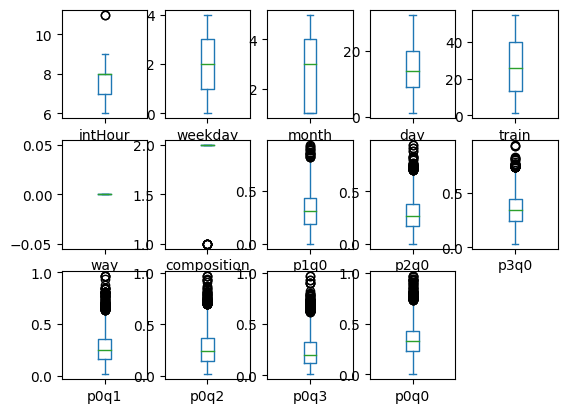

In [16]:
dataset.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
 
# Plotting a figure of width 3 and height 6
pyplot.rcParams['figure.figsize'] = (18, 9)
pyplot.show()


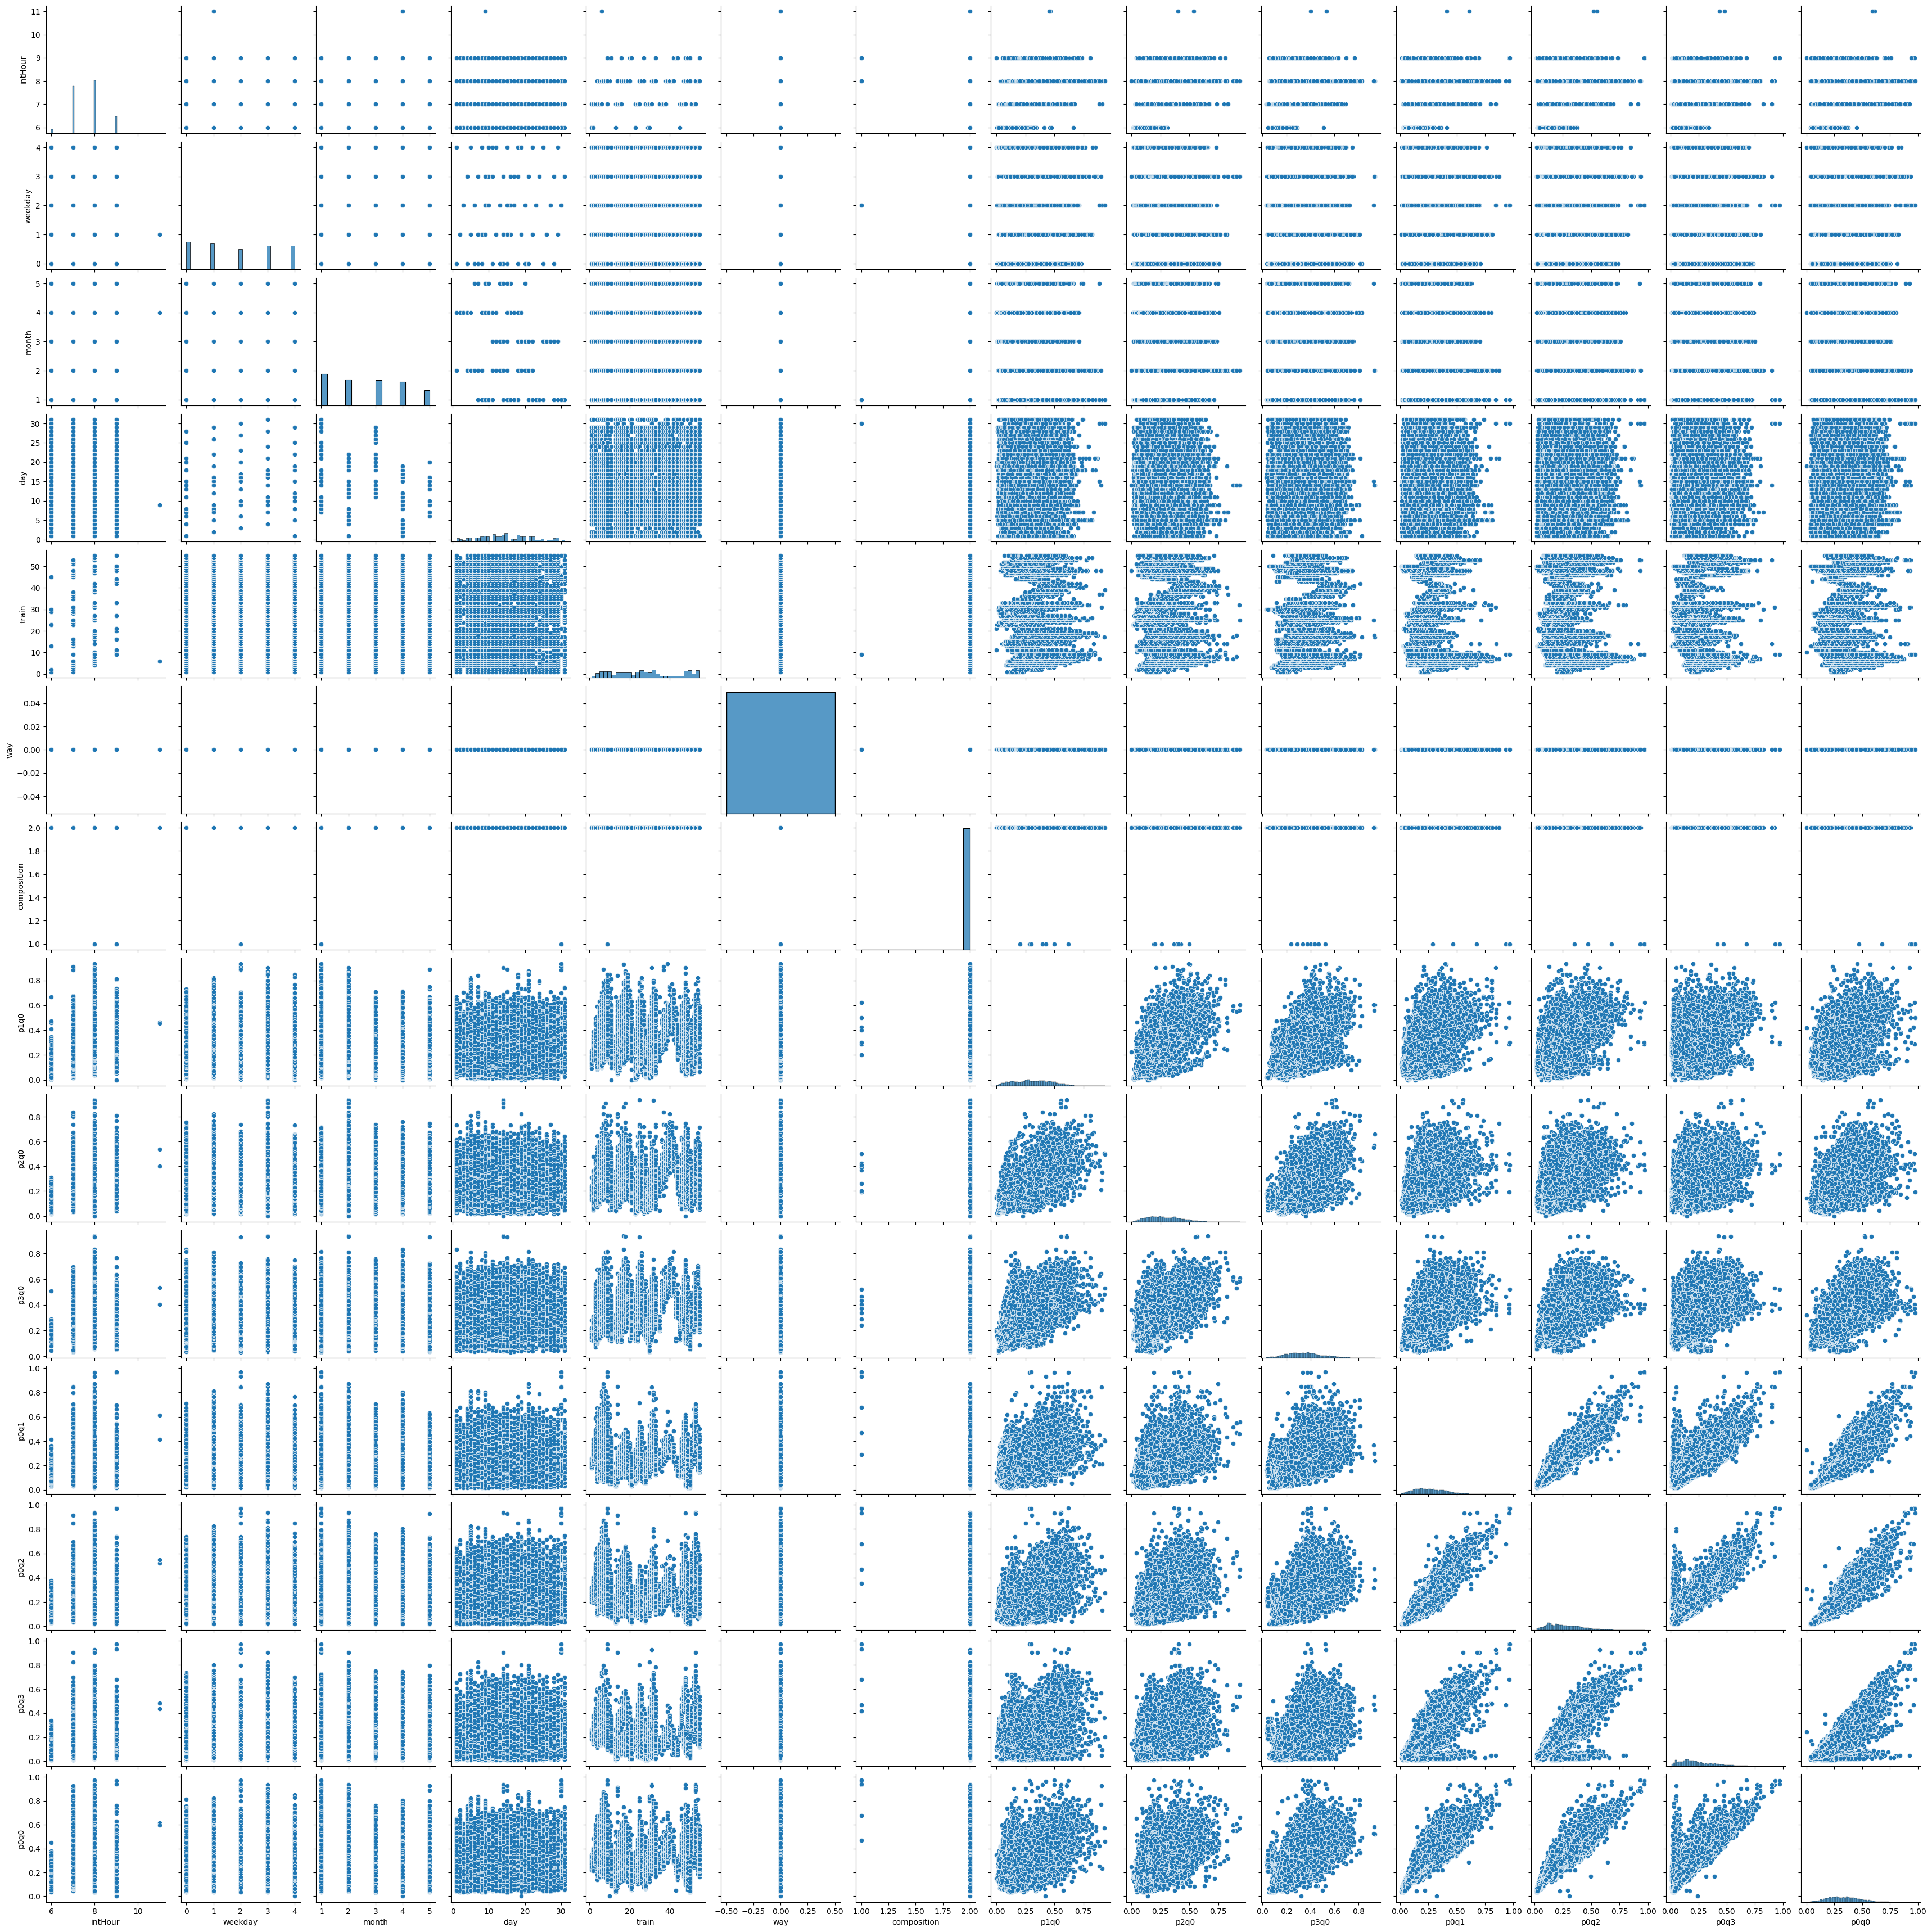

In [17]:
seaborn.pairplot(dataset)

C:\Users\marce\AppData\Local\Temp\ipykernel_5100\482825955.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(dataset.corr(),annot=True)


<AxesSubplot: >

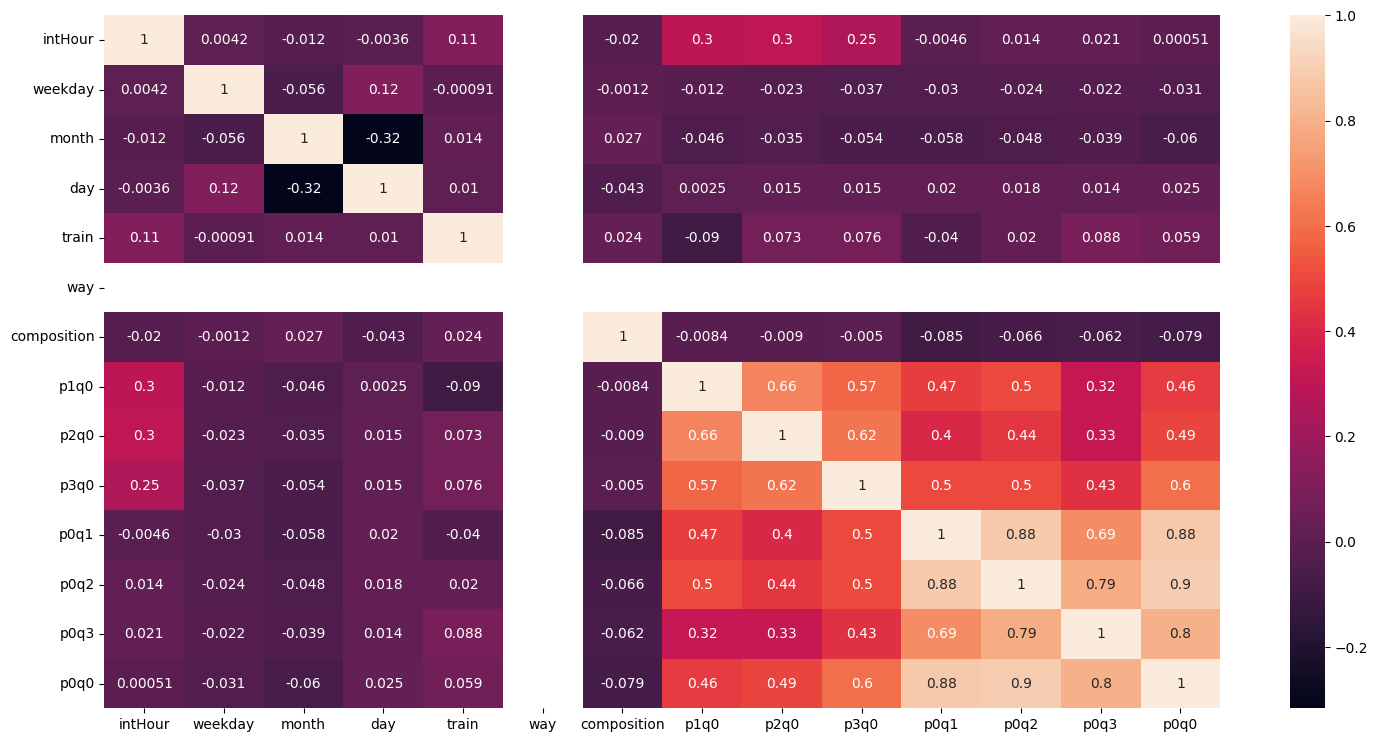

In [18]:
seaborn.heatmap(dataset.corr(),annot=True)

<AxesSubplot: xlabel='train', ylabel='hour'>

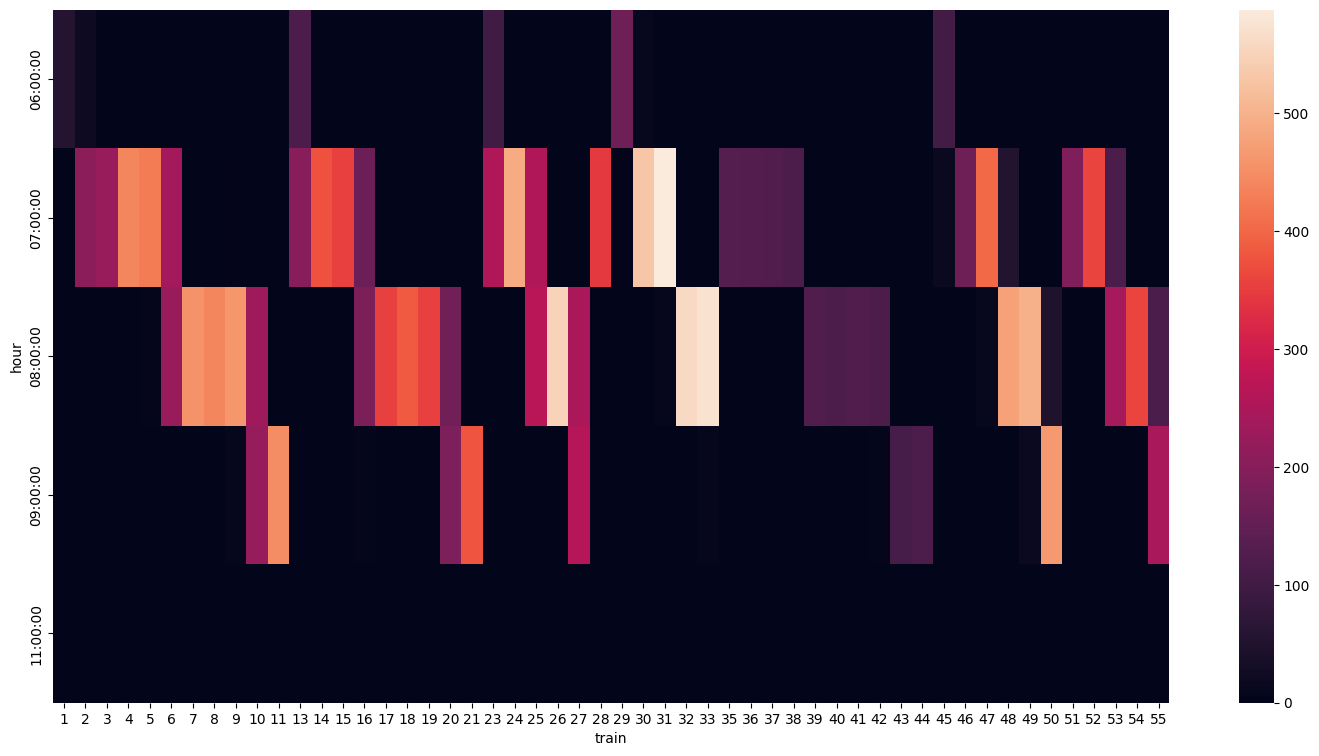

In [19]:
seaborn.heatmap(dataset.groupby(['hour','train']).size().unstack(fill_value=0))

<AxesSubplot: xlabel='train', ylabel='station'>

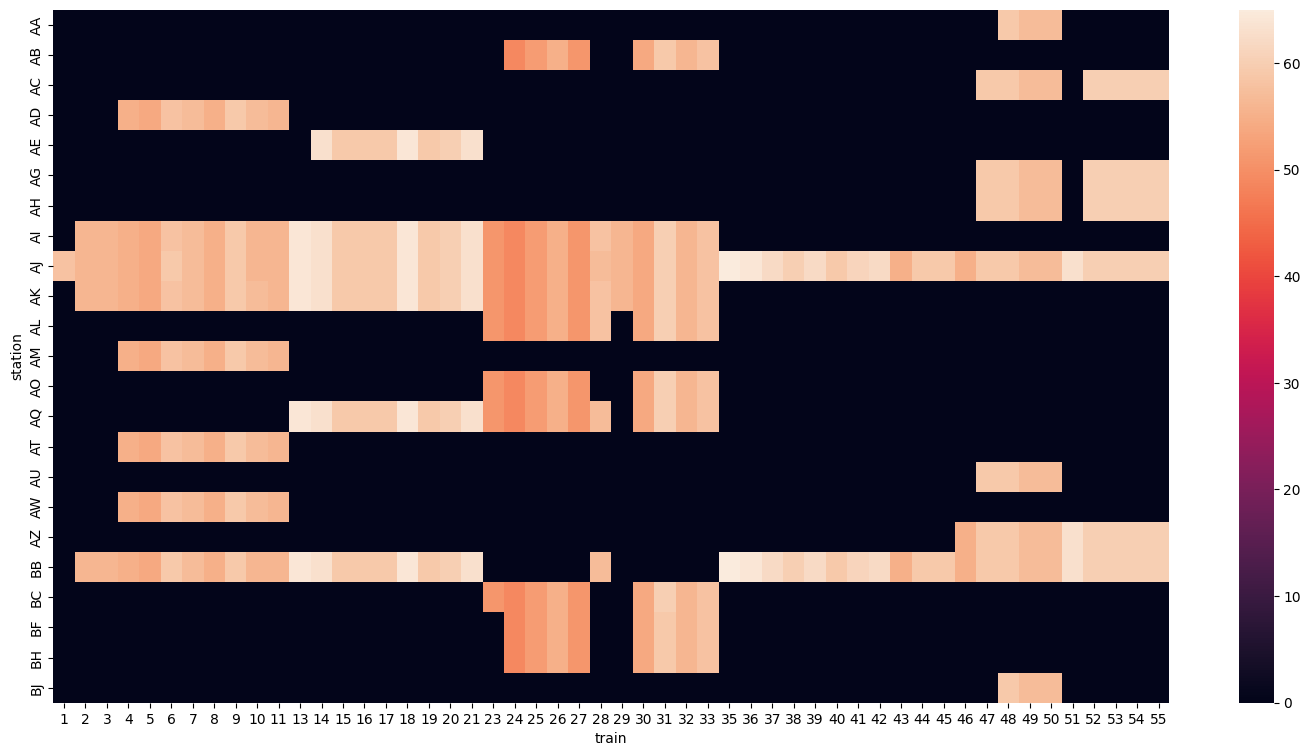

In [20]:
seaborn.heatmap(dataset.groupby(['station','train']).size().unstack(fill_value=0))

<AxesSubplot: xlabel='day', ylabel='train'>

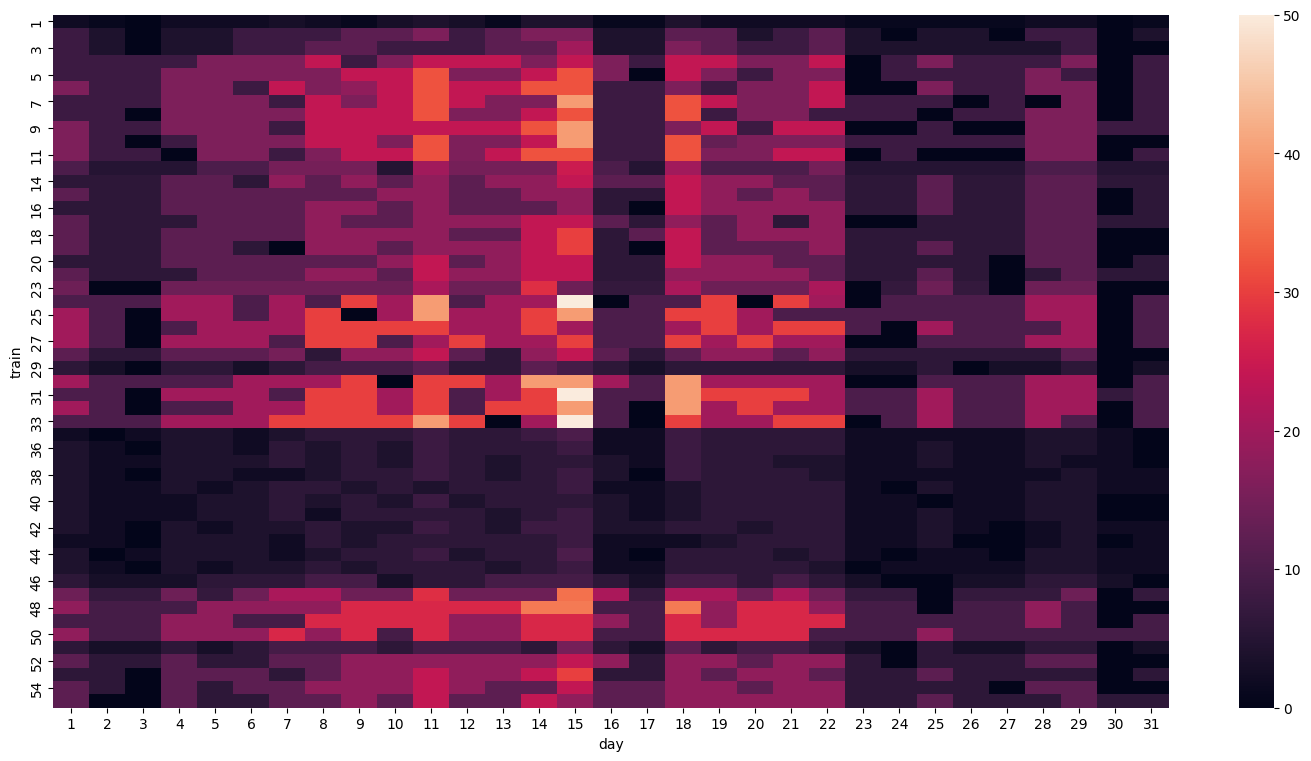

In [21]:
seaborn.heatmap(dataset.groupby(['train','day']).size().unstack(fill_value=0))

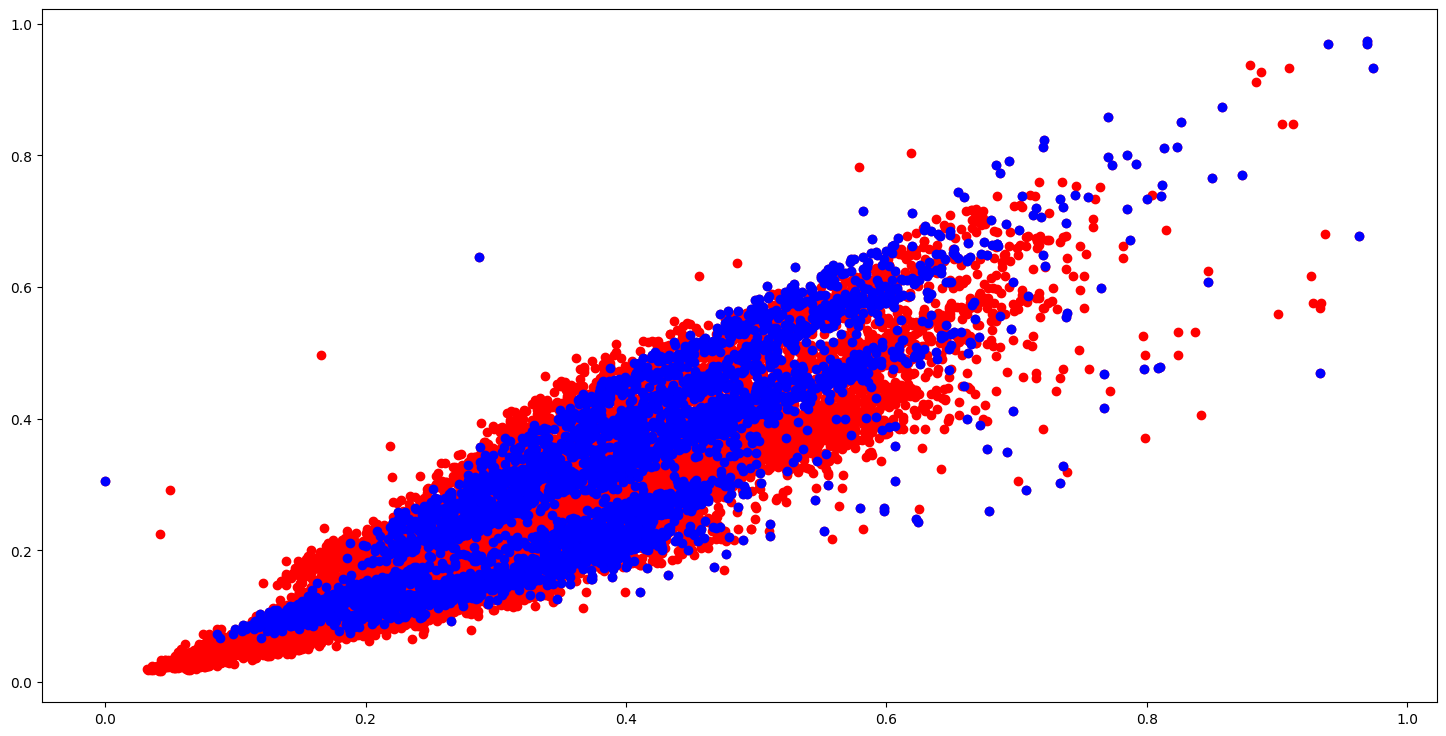

In [22]:

pyplot.scatter(dataset["p0q0"],dataset["p0q2"],c="r")
pyplot.scatter(dataset.query("train <= 11")["p0q0"],dataset.query("train <= 11")["p0q2"],c="b")


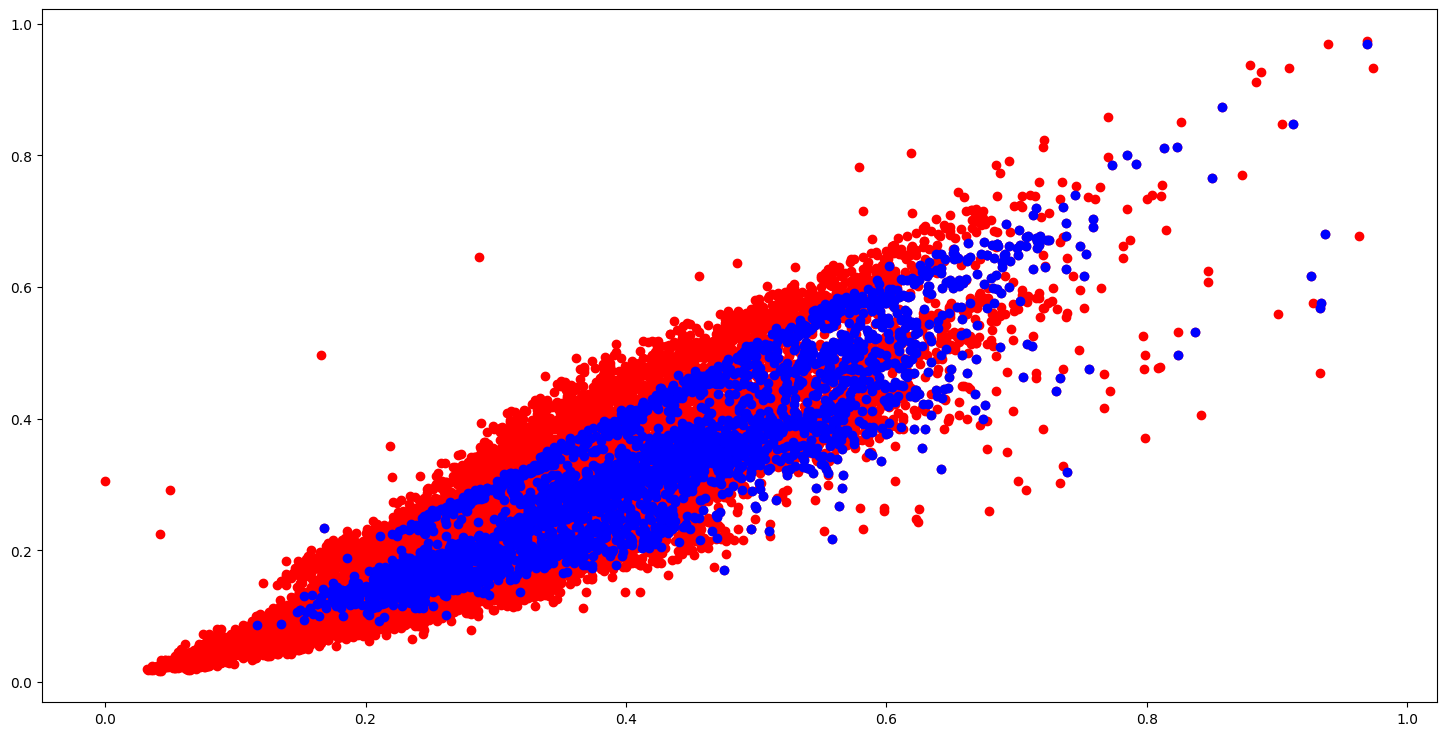

In [23]:
pyplot.scatter(dataset["p0q0"],dataset["p0q2"],c="r")
pyplot.scatter(dataset.query("station == 'AJ'")["p0q0"],dataset.query("station == 'AJ'")["p0q2"],c="b")

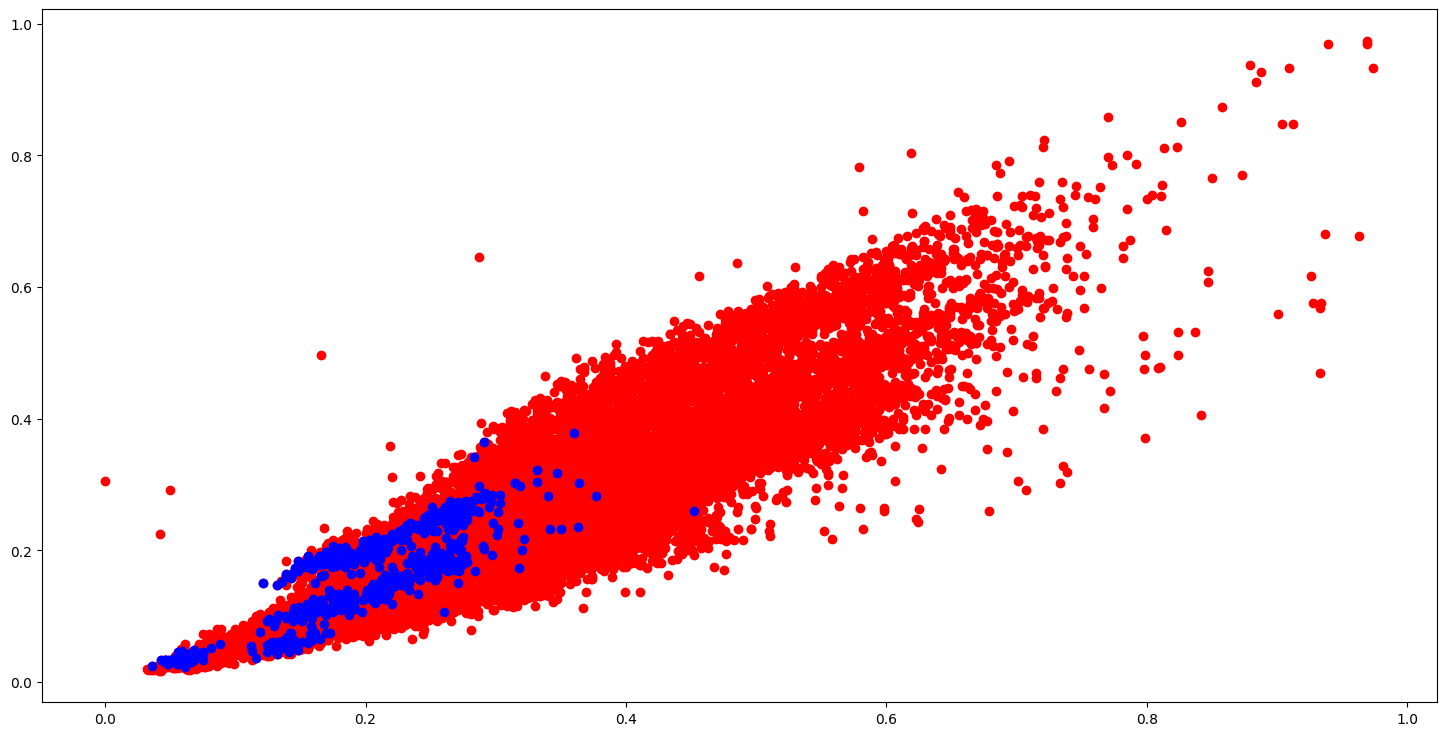

In [24]:
pyplot.scatter(dataset["p0q0"],dataset["p0q2"],c="r")
pyplot.scatter(dataset.query("intHour == 6")["p0q0"],dataset.query("intHour == 6")["p0q2"],c="b")

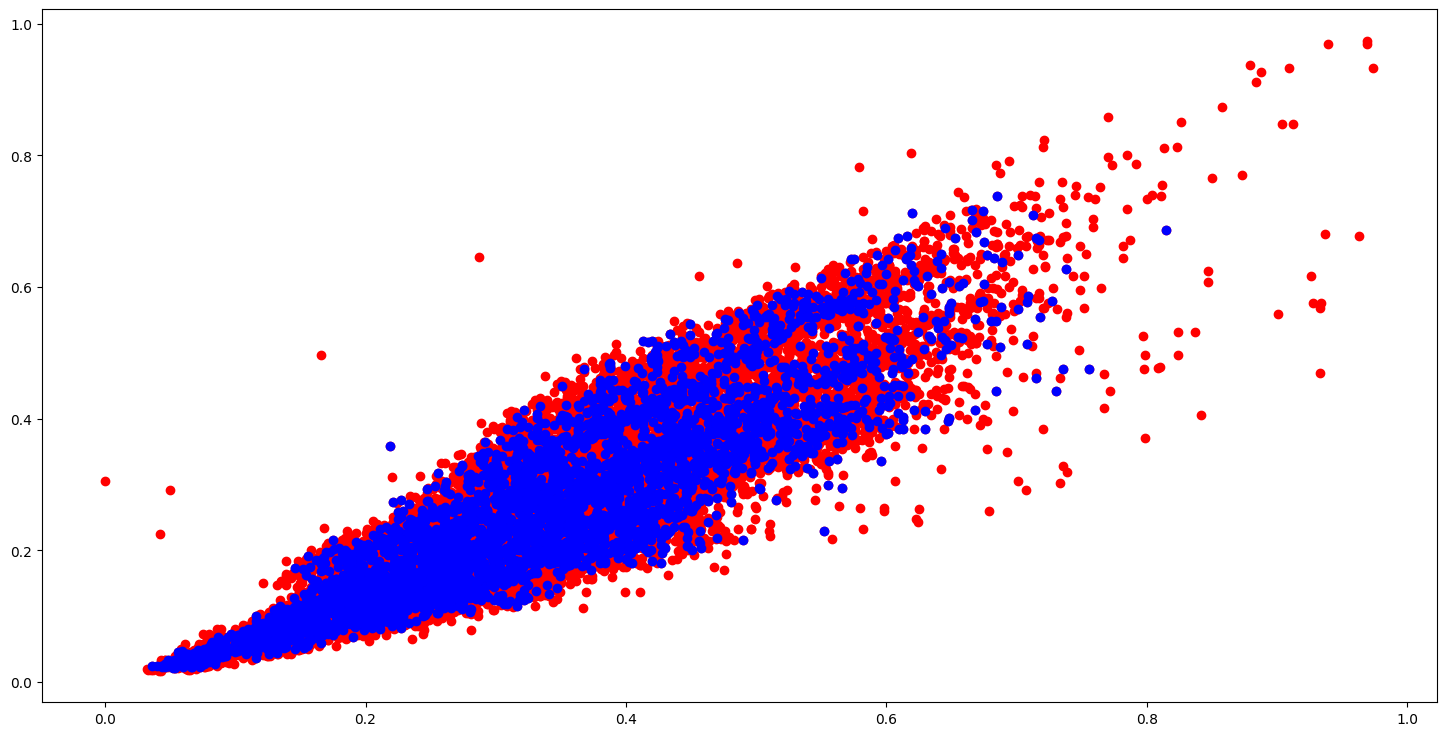

In [25]:
pyplot.scatter(dataset["p0q0"],dataset["p0q2"],c="r")
pyplot.scatter(dataset.query("weekday == 0")["p0q0"],dataset.query("weekday == 0")["p0q2"],c="b")

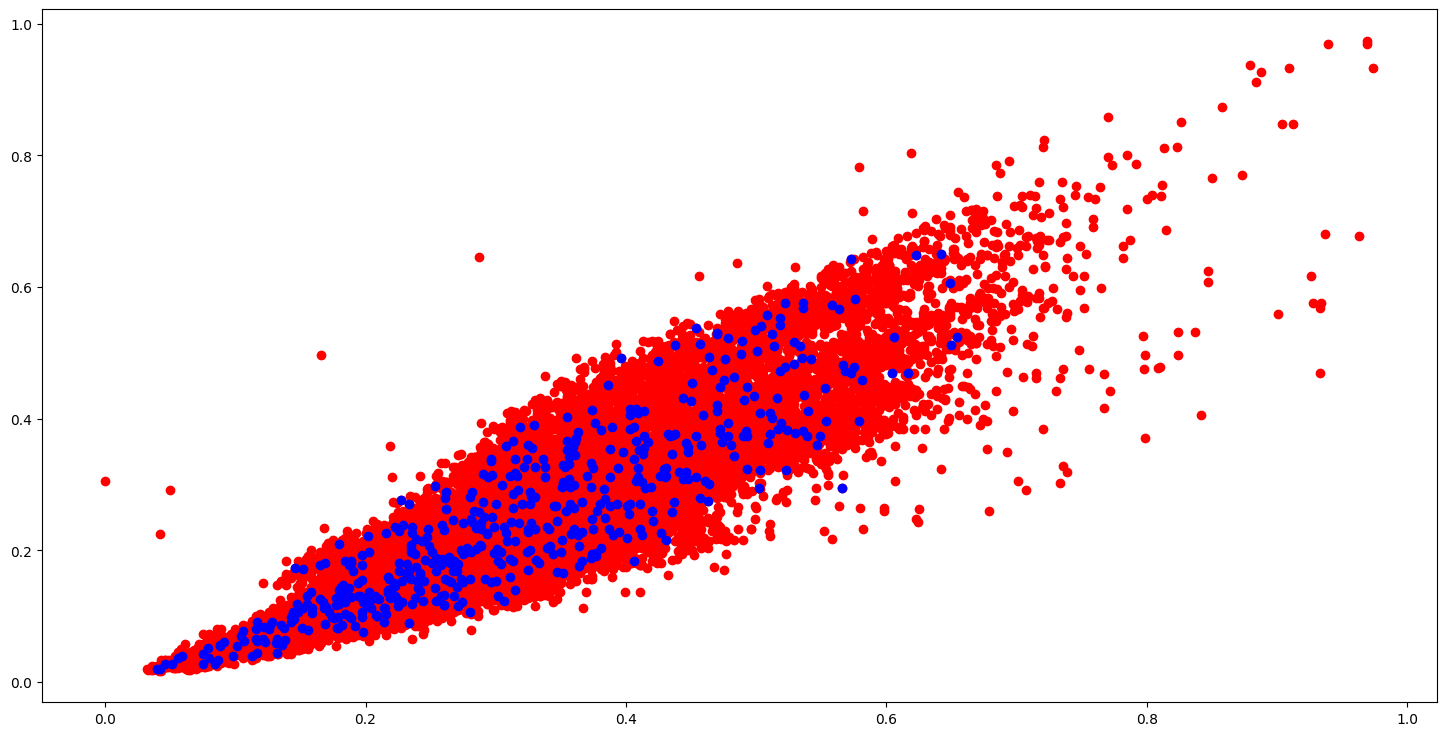

In [26]:
pyplot.scatter(dataset["p0q0"],dataset["p0q2"],c="r")
pyplot.scatter(dataset.query("day == 1")["p0q0"],dataset.query("day == 1")["p0q2"],c="b")

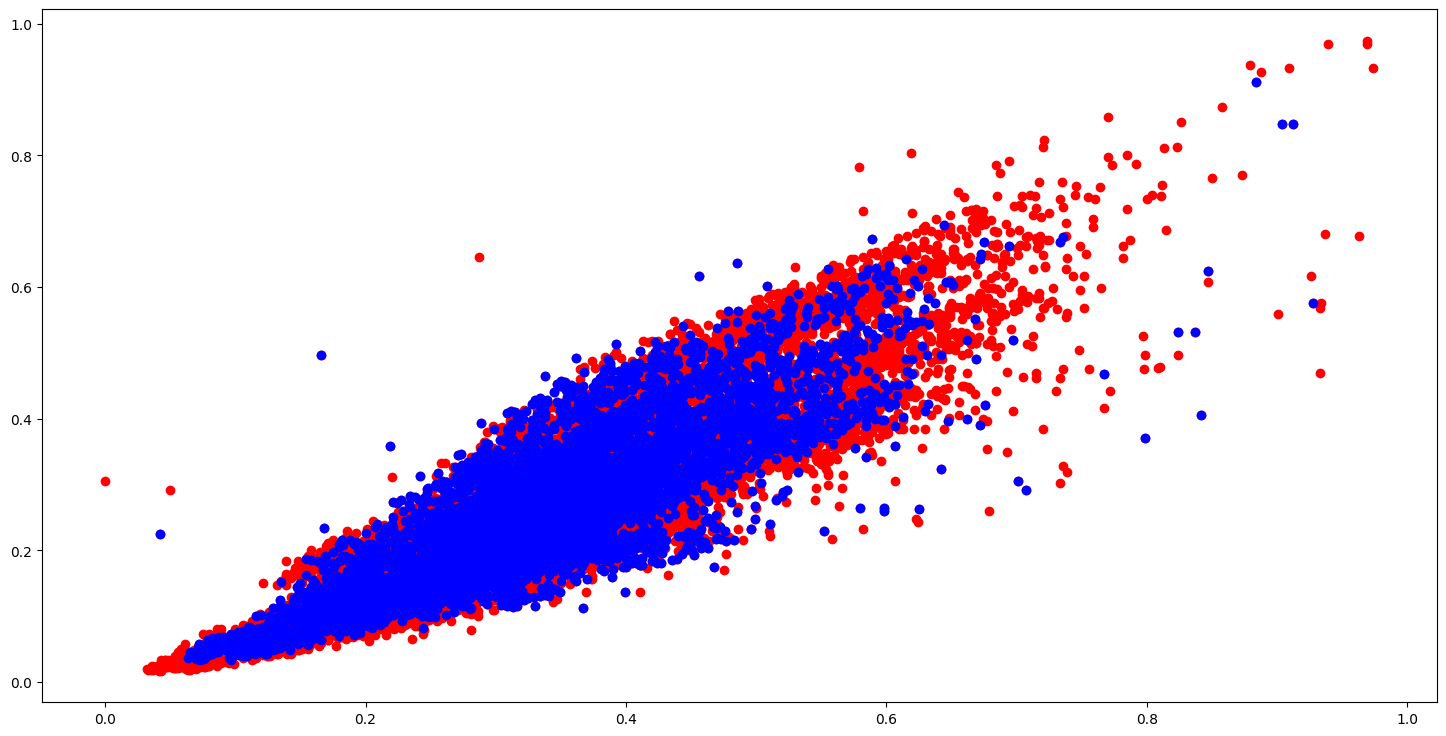

In [27]:
pyplot.scatter(dataset["p0q0"],dataset["p0q2"],c="r")
pyplot.scatter(dataset.query("intHour == 7")["p0q0"],dataset.query("intHour == 7")["p0q2"],c="b")

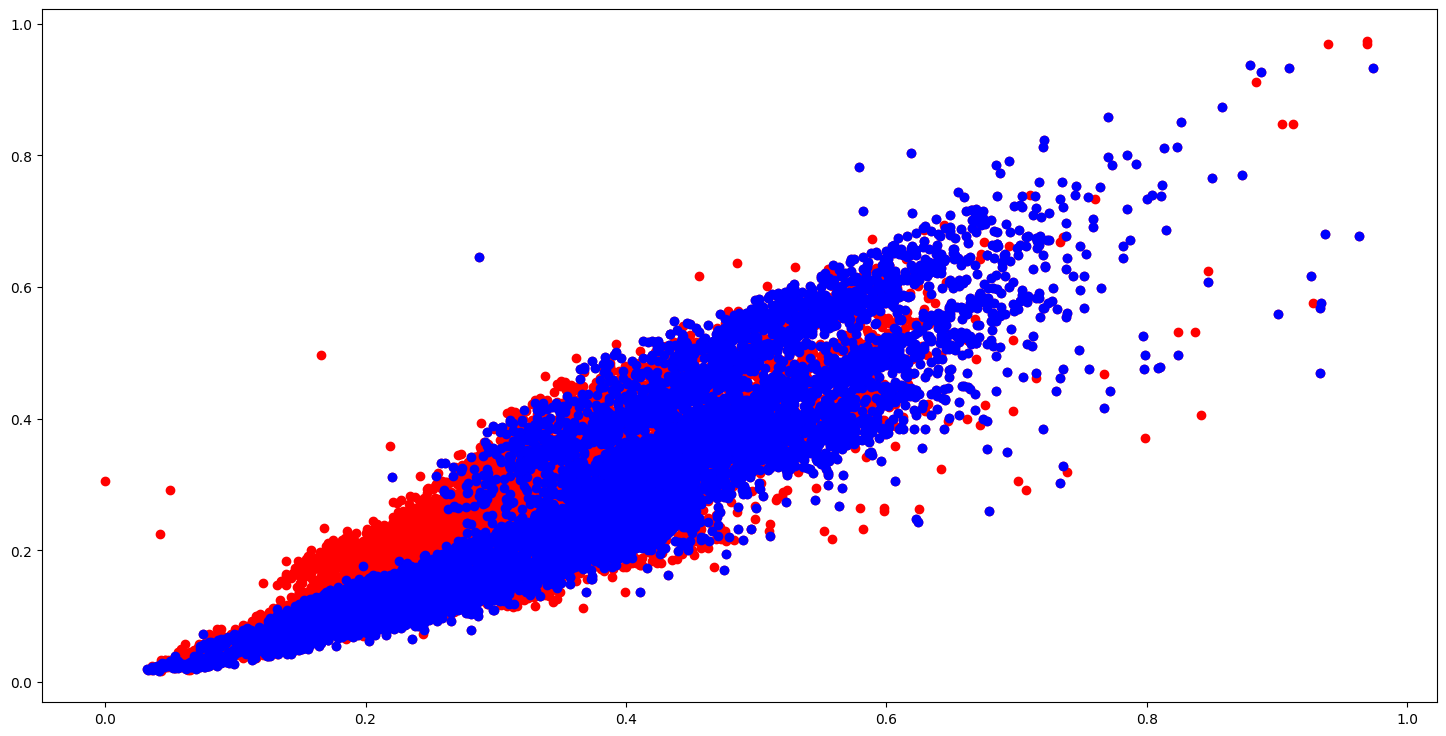

In [28]:
pyplot.scatter(dataset["p0q0"],dataset["p0q2"],c="r")
pyplot.scatter(dataset.query("intHour == 8")["p0q0"],dataset.query("intHour == 8")["p0q2"],c="b")

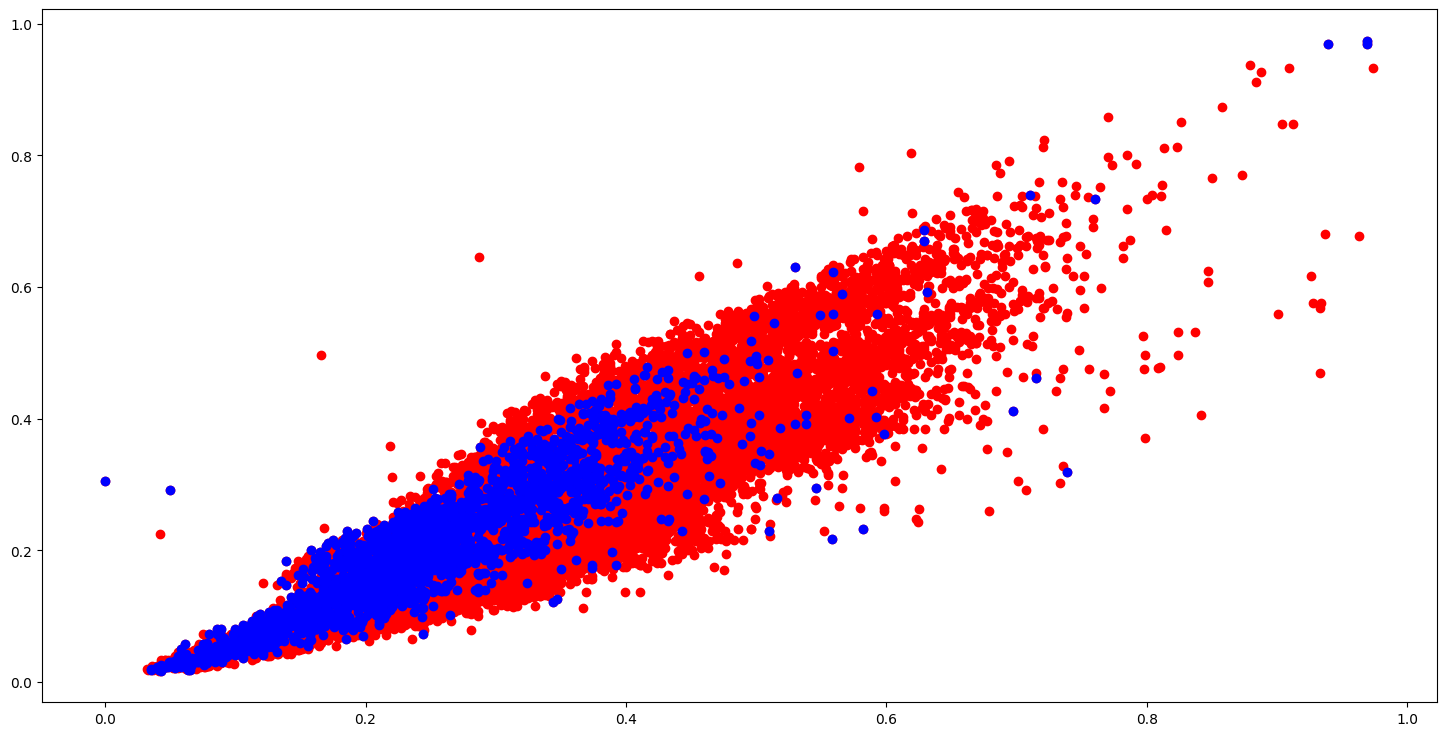

In [29]:
pyplot.scatter(dataset["p0q0"],dataset["p0q2"],c="r")
pyplot.scatter(dataset.query("intHour == 9")["p0q0"],dataset.query("intHour == 9")["p0q2"],c="b")

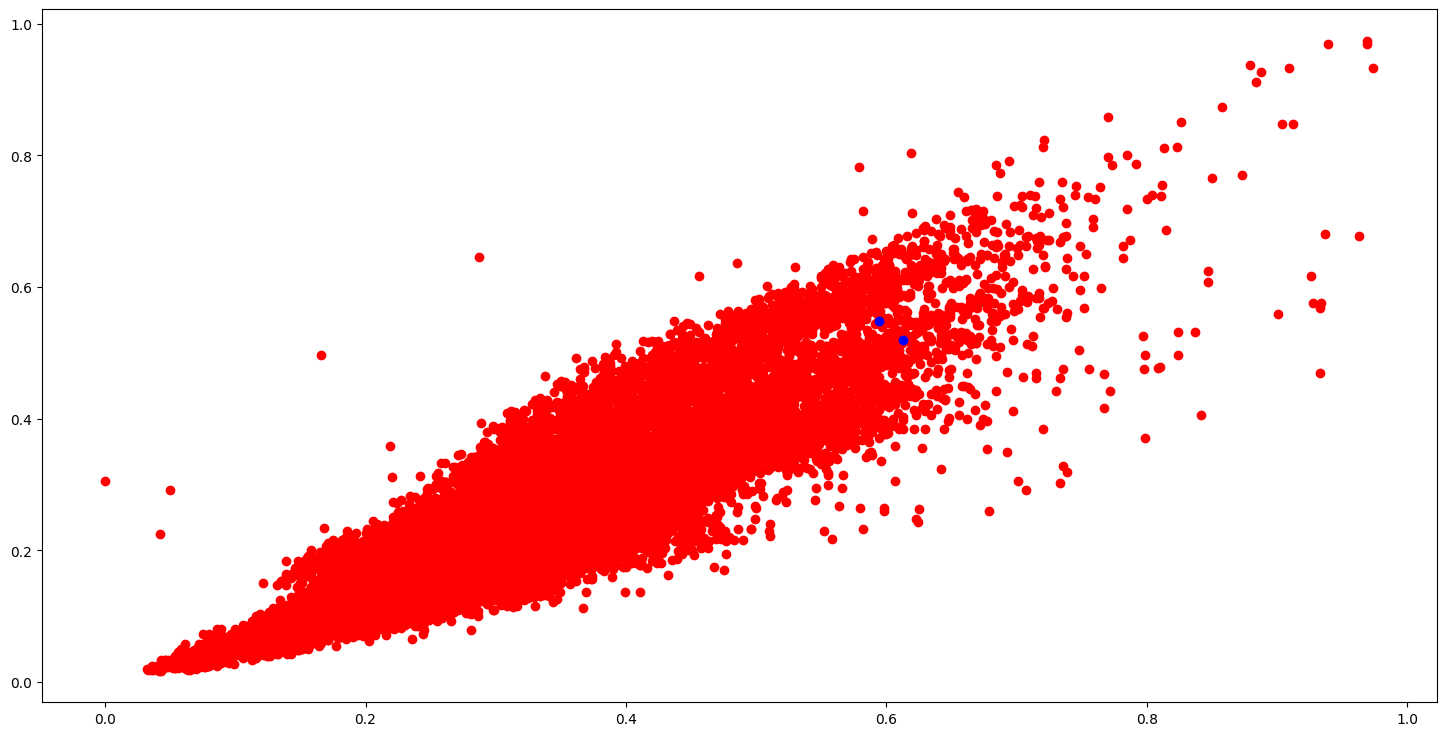

In [30]:
pyplot.scatter(dataset["p0q0"],dataset["p0q2"],c="r")
pyplot.scatter(dataset.query("intHour == 11")["p0q0"],dataset.query("intHour == 11")["p0q2"],c="b")

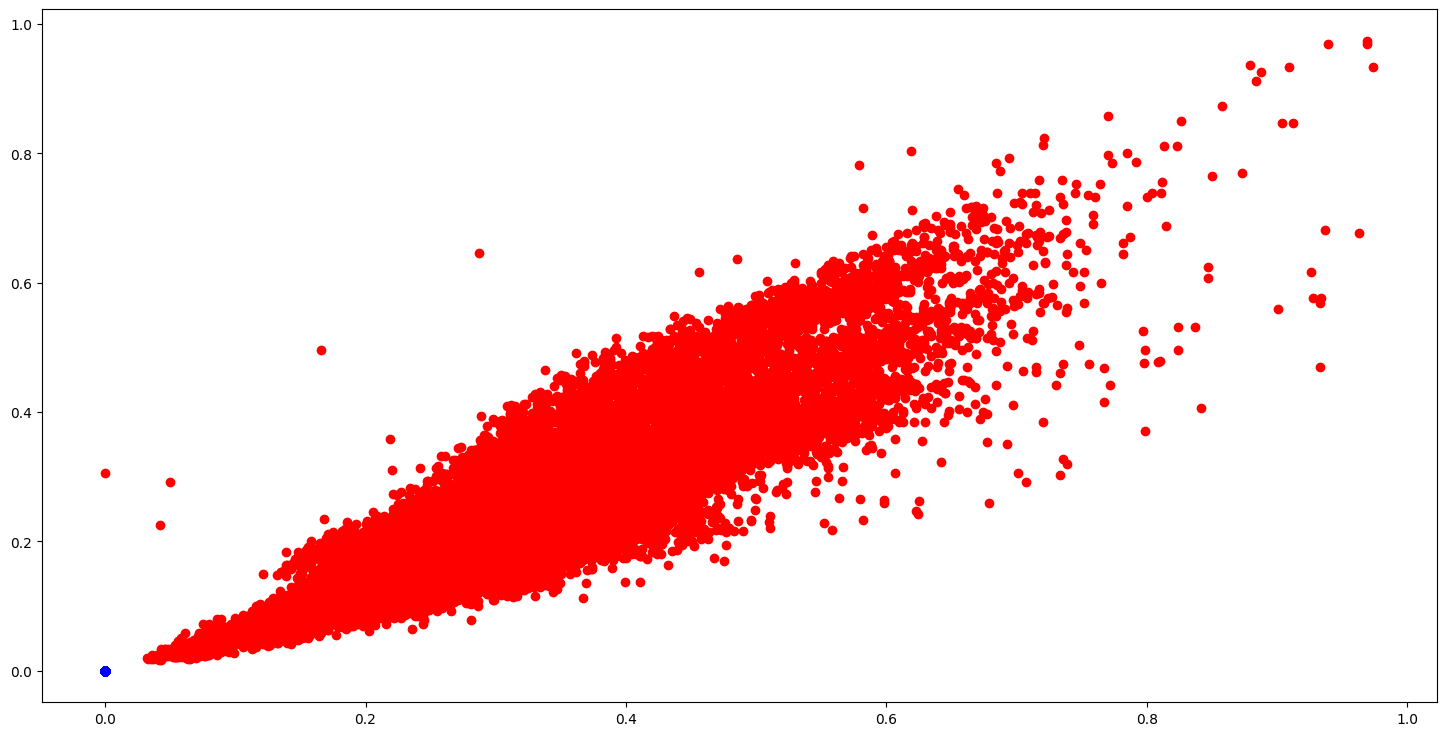

In [31]:
pyplot.scatter(dataset["p0q0"],dataset["p0q2"],c="r")
pyplot.scatter(dataset.isnull()["p0q0"],dataset.isnull()["p0q2"],c="b")

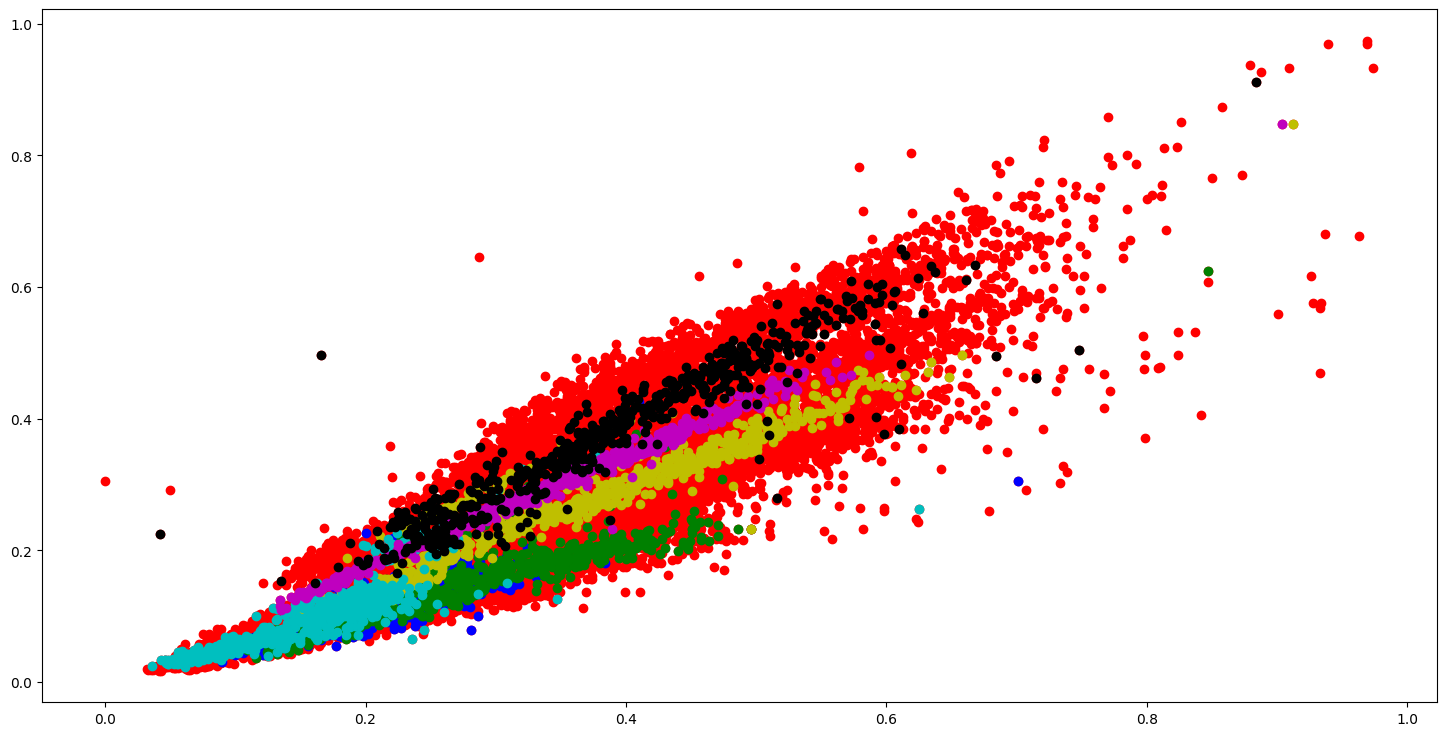

In [32]:
pyplot.scatter(dataset["p0q0"],dataset["p0q2"],c="r")
pyplot.scatter(dataset.query("train <= 21 and train >= 11 & station == 'AE'")["p0q0"],dataset.query("train <= 21 & train >= 11 & station == 'AE'")["p0q2"],c="b")
pyplot.scatter(dataset.query("train <= 21 and train >= 11 & station == 'AI'")["p0q0"],dataset.query("train <= 21 & train >= 11 & station == 'AI'")["p0q2"],c="g")
pyplot.scatter(dataset.query("train <= 21 and train >= 11 & station == 'AJ'")["p0q0"],dataset.query("train <= 21 & train >= 11 & station == 'AJ'")["p0q2"],c="y")
pyplot.scatter(dataset.query("train <= 21 and train >= 11 & station == 'AK'")["p0q0"],dataset.query("train <= 21 & train >= 11 & station == 'AK'")["p0q2"],c="c")
pyplot.scatter(dataset.query("train <= 21 and train >= 11 & station == 'AQ'")["p0q0"],dataset.query("train <= 21 & train >= 11 & station == 'AQ'")["p0q2"],c="m")
pyplot.scatter(dataset.query("train <= 21 and train >= 11 & station == 'BB'")["p0q0"],dataset.query("train <= 21 & train >= 11 & station == 'BB'")["p0q2"],c="k")


In [33]:
array = dataset.values
X = array[:,0:6]
y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [34]:
print(X_train)

[[Timestamp('2019-01-29 00:00:00') 7 1 1 29 24]
 [Timestamp('2019-01-14 00:00:00') 7 0 1 14 31]
 [Timestamp('2019-03-25 00:00:00') 9 0 3 25 21]
 ...
 [Timestamp('2019-03-22 00:00:00') 7 4 3 22 24]
 [Timestamp('2019-02-04 00:00:00') 7 0 2 4 47]
 [Timestamp('2019-01-17 00:00:00') 9 3 1 17 10]]


In [35]:
print(Y_train)

[0 0 0 ... 0 0 0]
